HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [1]:
# IMPORTS/CONSTANTS FOR EXPERIMENT

from main import *  # Must be reimported when changes made to module file

treatment_mapping = (
    {  # TO DO : change name to treatment_info and add columns in df REMI
        1: {"treatment": "vehicles",
            "color": "white",
            "experiments": ["dose_response", "agonist_antagonist"],
            },
        2: {"treatment": "0.3mg/kgTCB",
            "color": "salmon",
            "experiments": ["dose_response"],
            },
        3: {"treatment": "3mg/kgTCB",
            "color": "red",
            "experiments": ["dose_response", "agonist_antagonist"],
            },
        4: {"treatment": "10mg/kgTCB",
            "color": "firebrick",
            "experiments": ["dose_response"],
            },
        5: {"treatment": "0.2mg/kgMDL",
            "color": "grey",
            "experiments": ["agonist_antagonist"],
            },
        6: {"treatment": "TCB+MDL",
            "color": "black",
            "experiments": ["agonist_antagonist"],
            },
    }
)


#PDD would like to do manuely with no stats BUT

#chose one set it and its a constant
#JJB: possible outlier tests  = ['grubbs', 'ROUT']  #JJB chece if grubbs is itterative and what limit set 
# possible post hoc = [ 'pLSD' , 'tukey' ]


compound_ratio_mapping = { 
    "DOPAC": ["DA"],
    "5HIAA": ["5HT"],
    "3MT": ["DA"],
    "HVA": ["DA", "3MT", "DOPAC"],
    "GLN": ["GLU"],
}
region_subclassification = {
    'cortex': {'regions': ['OF', 'PL', 'CC', 'IC', 'M', 'SL1', 'SR1', 'AC', 'V'], 'color': 'mediumblue'}, #SR6, SL6 ?
    'subcortical_telencephalon': {'regions': ['Am', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL'], 'color': 'orange'},
    'diencephalon': {'regions': ['MD', 'VPL', 'VPR', 'DG', 'Y'], 'color': 'darkorchid'},
    'mesencephalon': {'regions': ['SC', 'SN', 'VTA', 'DR', 'MR'], 'color': 'forestgreen'},
    'cerebellum': {'regions': ['CE'], 'color': 'peru'}
}
compound_subclassification = {
    'monoamines':['LDOPA', 'NA', 'A', '5HTP', 'DOPAC', 'DA', '5HIAA', 'HVA', '5HT', 'VMA', '3MT'],
    'amino_acids':['ASP', 'GLU', 'ASPN', 'HIS', 'LSER', 'GLN', 'ARG', 'GLY', 'THR', 'TAU', 'ALA', 'TYR', 'GABA'],
    'neurotransmitters':['DA','NA','5HT','GLU','GABA','ASP','GLY']
}



filename = "TCB2_data_HPLC.csv"  # TCB2 #using current working directory plus file name
HT_filename = "TCB2_data_HT.csv"


# JJB : this is how I believe it should be, your code relies on quantitative_statistics and correlation_statistics this should be removed
experimental_info = {
    "dose_response": {"groups": [1, 2, 3, 4], 
                      "independant_vars": ["TCB2"], 
                      "paired": False,
                      "parametric": True, #idealy this would be True / False / Check : check would involve checking the data using the spearman test which should already be done then taking the majority of the data to be parametric or not chose that 
                      "outliers": ['grubbs']
                      },


    "agonist_antagonist": {"groups": [1,3,5,6,],  
                         "independant_vars": ["TCB2","MDL"],
                         "paired": False,
                         "parametric": True,
                         "outliers": ["grubbs"]
                           },
}


saveMetadata(
    filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info, region_subclassification=region_subclassification, compound_subclassification=compound_subclassification, compound_ratio_mapping=compound_ratio_mapping
)

saveMetadata(
    HT_filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info, region_subclassification=region_subclassification, compound_subclassification=compound_subclassification, compound_ratio_mapping=compound_ratio_mapping
)


TREATMENT MAPPING {1: {'treatment': 'vehicles', 'color': 'white', 'experiments': ['dose_response', 'agonist_antagonist']}, 2: {'treatment': '0.3mg/kgTCB', 'color': 'salmon', 'experiments': ['dose_response']}, 3: {'treatment': '3mg/kgTCB', 'color': 'red', 'experiments': ['dose_response', 'agonist_antagonist']}, 4: {'treatment': '10mg/kgTCB', 'color': 'firebrick', 'experiments': ['dose_response']}, 5: {'treatment': '0.2mg/kgMDL', 'color': 'grey', 'experiments': ['agonist_antagonist']}, 6: {'treatment': 'TCB+MDL', 'color': 'black', 'experiments': ['agonist_antagonist']}} SAVED TO /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC SUBCACHE
EXPERIMENTAL INFO {'dose_response': {'groups': [1, 2, 3, 4], 'independant_vars': ['TCB2'], 'paired': False, 'parametric': True, 'outliers': ['grubbs']}, 'agonist_antagonist': {'groups': [1, 3, 5, 6], 'independant_vars': ['TCB2', 'MDL'], 'paired': False, 'parametric': True, 'outliers': ['grubbs']}} SAVED TO /Users/jasminebutler/Desktop/phd/input/

In [4]:
#CONSTRUCTION
# justStats(filename, 
#           experiments=['dose_response'], 
#           compounds=['5HIAA/5HT'], 
#           regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
#                 "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
#                 "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], 
#         p_value_threshold=0.05)
subselectDf(getQuantitativeStats(filename), {'experiment':'dose_response', 'compound':'5HIAA/5HT', 'region':['Y','SC']})


Calculating stats for dose_response, 5HIAA/5HT, OF
Index(['mouse_id', 'group_id', 'value', 'compound', 'region', 'treatment',
       'color', 'experiment', 'grubbs_outlier', 'eliminated_grubbs_outlier'],
      dtype='object')

ONE_WAY_ANOVA SIGNIFICANT
          F   p_value
0  6.912724  0.000765

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB   -0.6167  0.0352 -1.2010 -0.0324    True
1  0.3mg/kgTCB   3mg/kgTCB   -0.4569  0.1716 -1.0412  0.1274   False
2  0.3mg/kgTCB    vehicles    0.2393  0.6922 -0.3450  0.8236   False
3   10mg/kgTCB   3mg/kgTCB    0.1598  0.8753 -0.4104  0.7300   False
4   10mg/kgTCB    vehicles    0.8560  0.0014  0.2857  1.4262    True
5    3mg/kgTCB    vehicles    0.6962  0.0114  0.1260  1.2664    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
Calculating stats for dos

,data_type,experiment,region,compound,test,is_significant,result


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
Invalid characters in identifier, replacing with '_' 
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
PLOTTING SIGNIFICANCE 
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].pkl
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ 

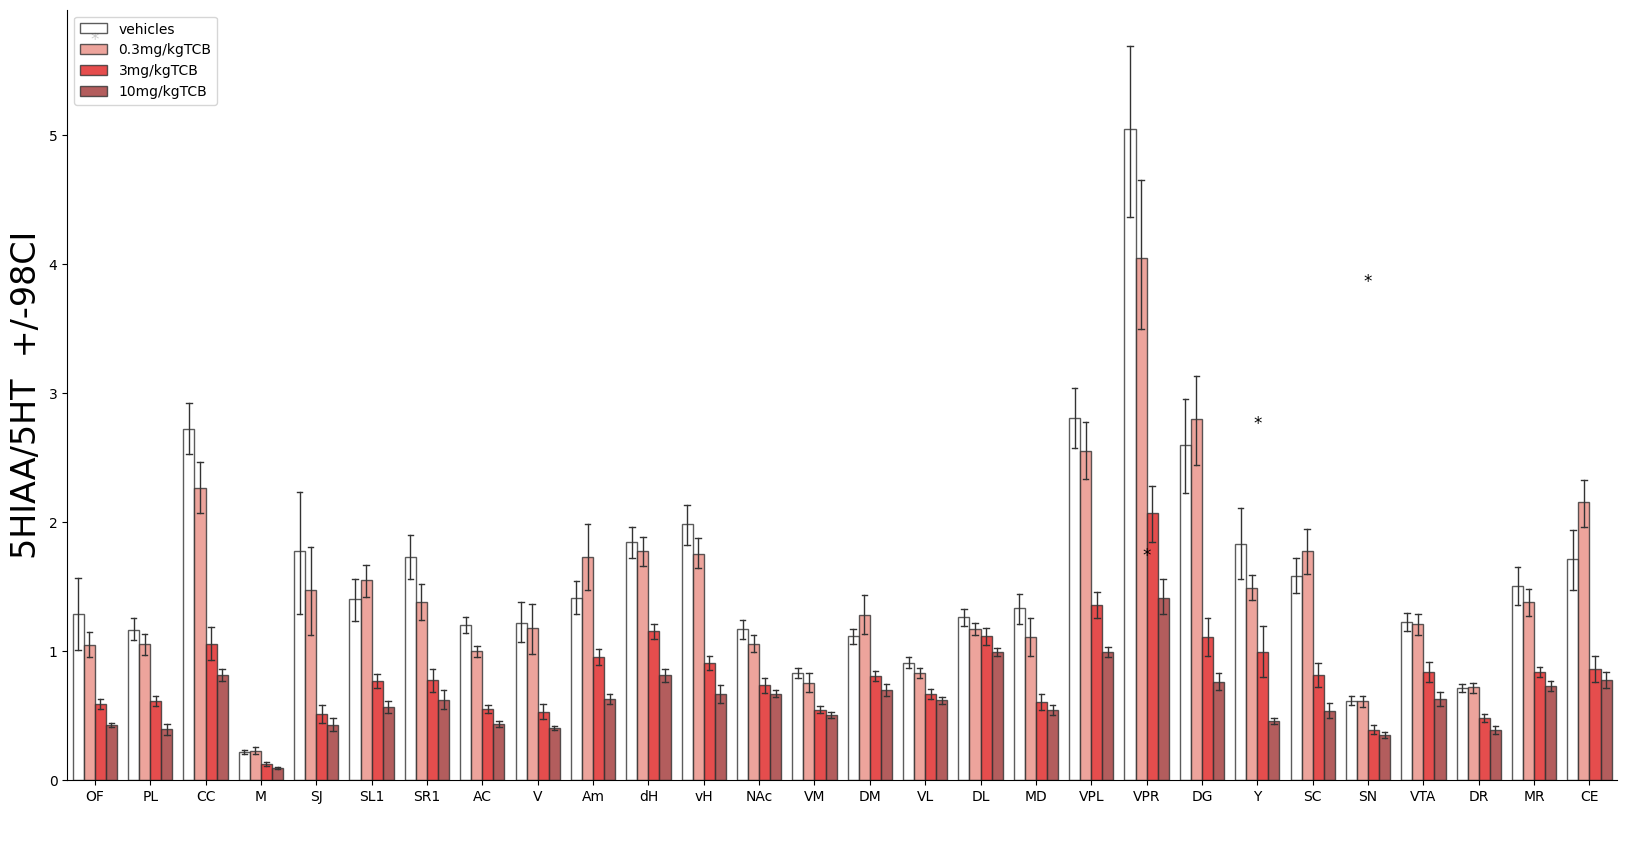

In [2]:
# quantitativeSummary(
#         filename,
#         experiment='dose_response',
#         histogram_type='compound', #chose a single compound or region
#         to_plot=['DA'], #chose a list of regions or compounds (x-axis of hist)
#         p_value_threshold=0.05,
#         columns=['DM','VM','DL','VL'],
#         from_scratch=True )

# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE

quantitativeSummary(filename)


In [ ]:
#CHOSE ALL OUTLIERS IN LOOP - REMI (ratios only compound_ratio_mapping)
percentageVehiclesFig(
        filename,
        experiment='dose_response',
        compound='DA',
        regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], #REMI i would ike this to work the same way it does for correlograms i.e. also specifying the order 
        from_scratch=True )


{'LSER/ASP', 'GABA/GLN', '5HT/THR', '5HIAA/ALA', '5HTP/ASPN', 'HVA/HIS', '3MT/GLY', 'ALA/HSER', 'VMA/ARG', 'ASP/ARG', 'ARG/DOPAC', 'LDOPA/ASPN', 'GLU/ARG', 'TYR/NA', 'LDOPA/5HT', 'HSER/5HTP', 'HSER/ASPN', '5HT/ARG', 'ASPN/THR', '5HT/DA', 'LSER', 'GLN/3MT', 'DA/5HIAA', 'DOPAC/5HT', 'HSER/DOPAC', 'GABA/HSER', 'HIS/5HT', 'ASP/GLY', 'GLN/5HIAA', 'TAU/LSER', 'DOPAC/TYR', 'HIS/5HTP', 'HIS/3MT', 'GLN/HVA', '5HTP/A', 'GLN/HIS', 'ASPN/DA', 'NA/TAU', 'VMA/ALA', 'HVA/TYR', 'VMA/NA', 'DA/THR', 'TYR/ALA', 'THR/TAU', 'A/THR', 'HVA/HSER', 'DOPAC/LDOPA', 'TYR/ASP', 'DOPAC/5HTP', 'LDOPA/ASP', 'GLY/5HTP', 'VMA/A', 'HSER/5HT', 'HVA/DA', 'GABA/ALA', '3MT/ASP', '5HT', 'GLU/GABA', 'ASP/THR', 'GABA/GLY', 'ARG/5HIAA', 'DOPAC/HVA', 'LSER/GLU', 'A/TYR', 'DOPAC/VMA', 'DA/TYR', '3MT/TYR', '5HT/5HTP', 'ASP/HIS', 'HIS/ASPN', 'GABA/DOPAC', '5HT/LDOPA', 'TYR/TAU', 'THR/DOPAC', '3MT/5HT', 'GABA/NA', 'HSER/TAU', 'NA/GABA', 'DA', 'TAU/GABA', '5HIAA/LDOPA', 'TYR/ARG', 'GABA/DA', 'HVA/GLY', 'DA/3MT', 'LDOPA/HVA', '5HTP/TH

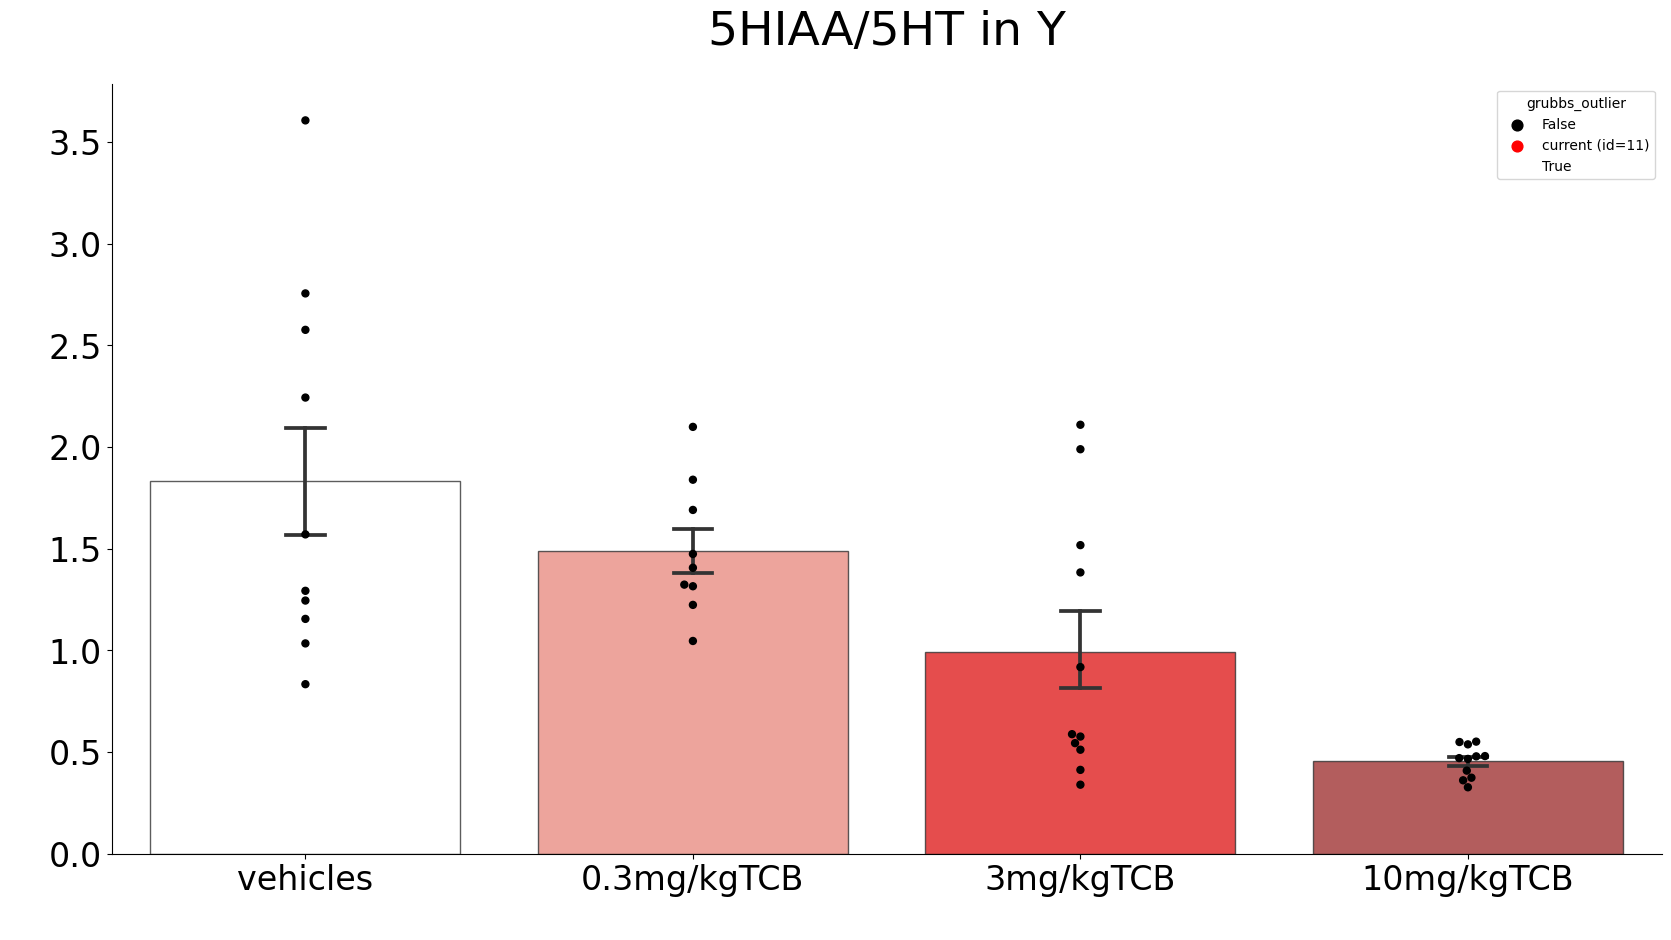

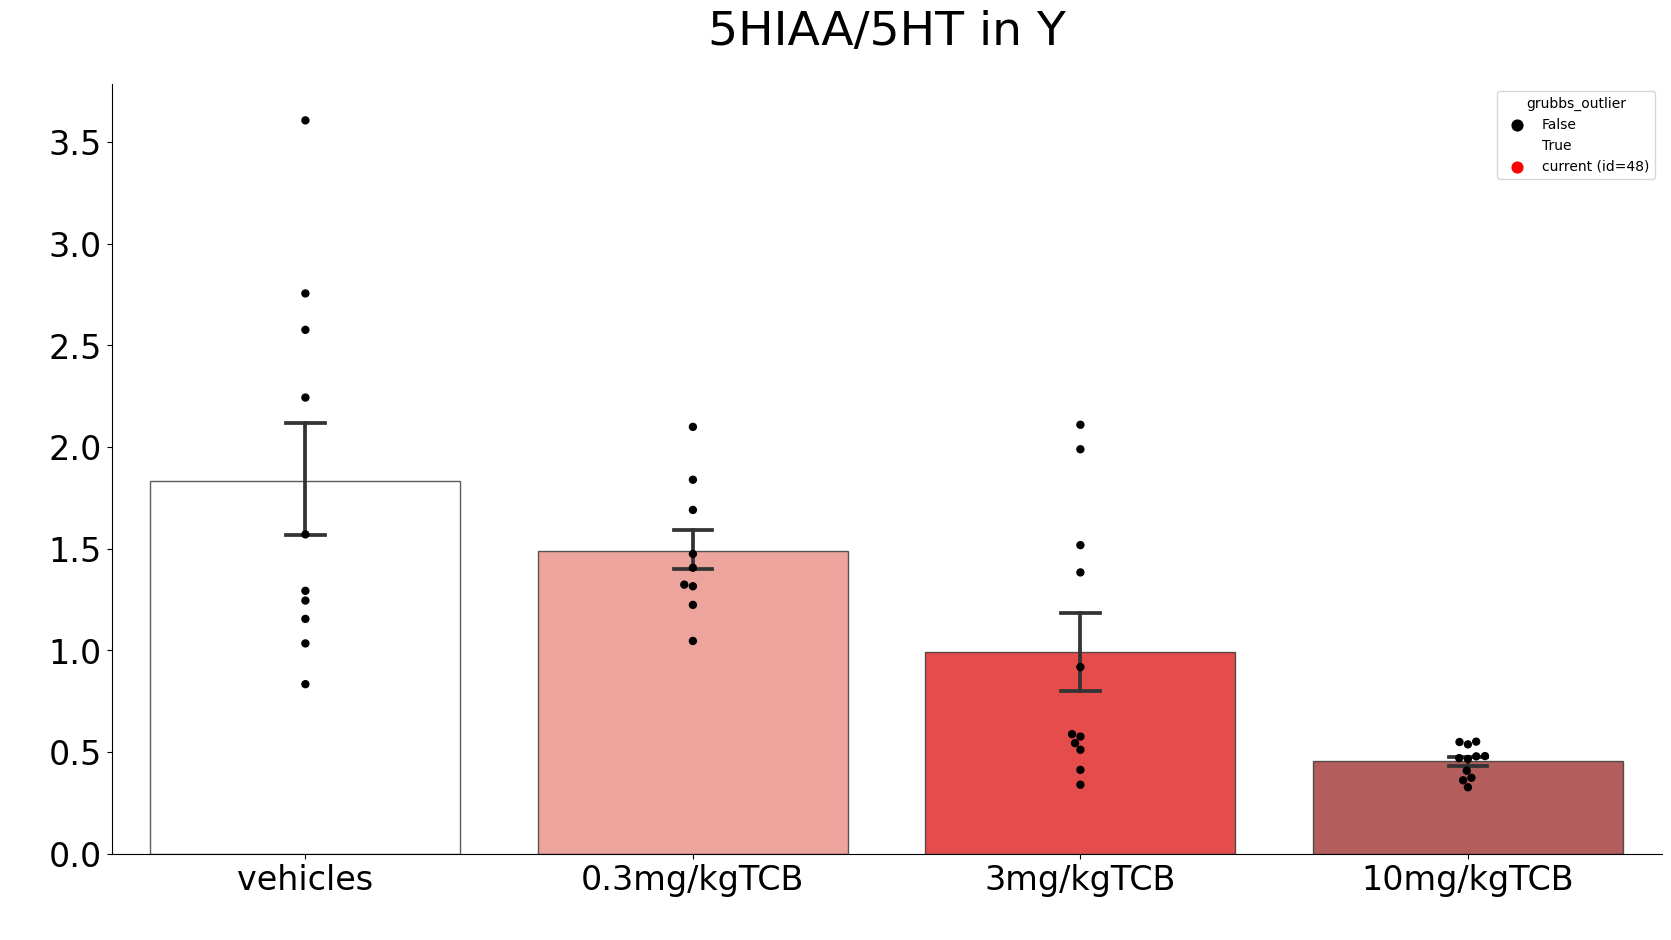

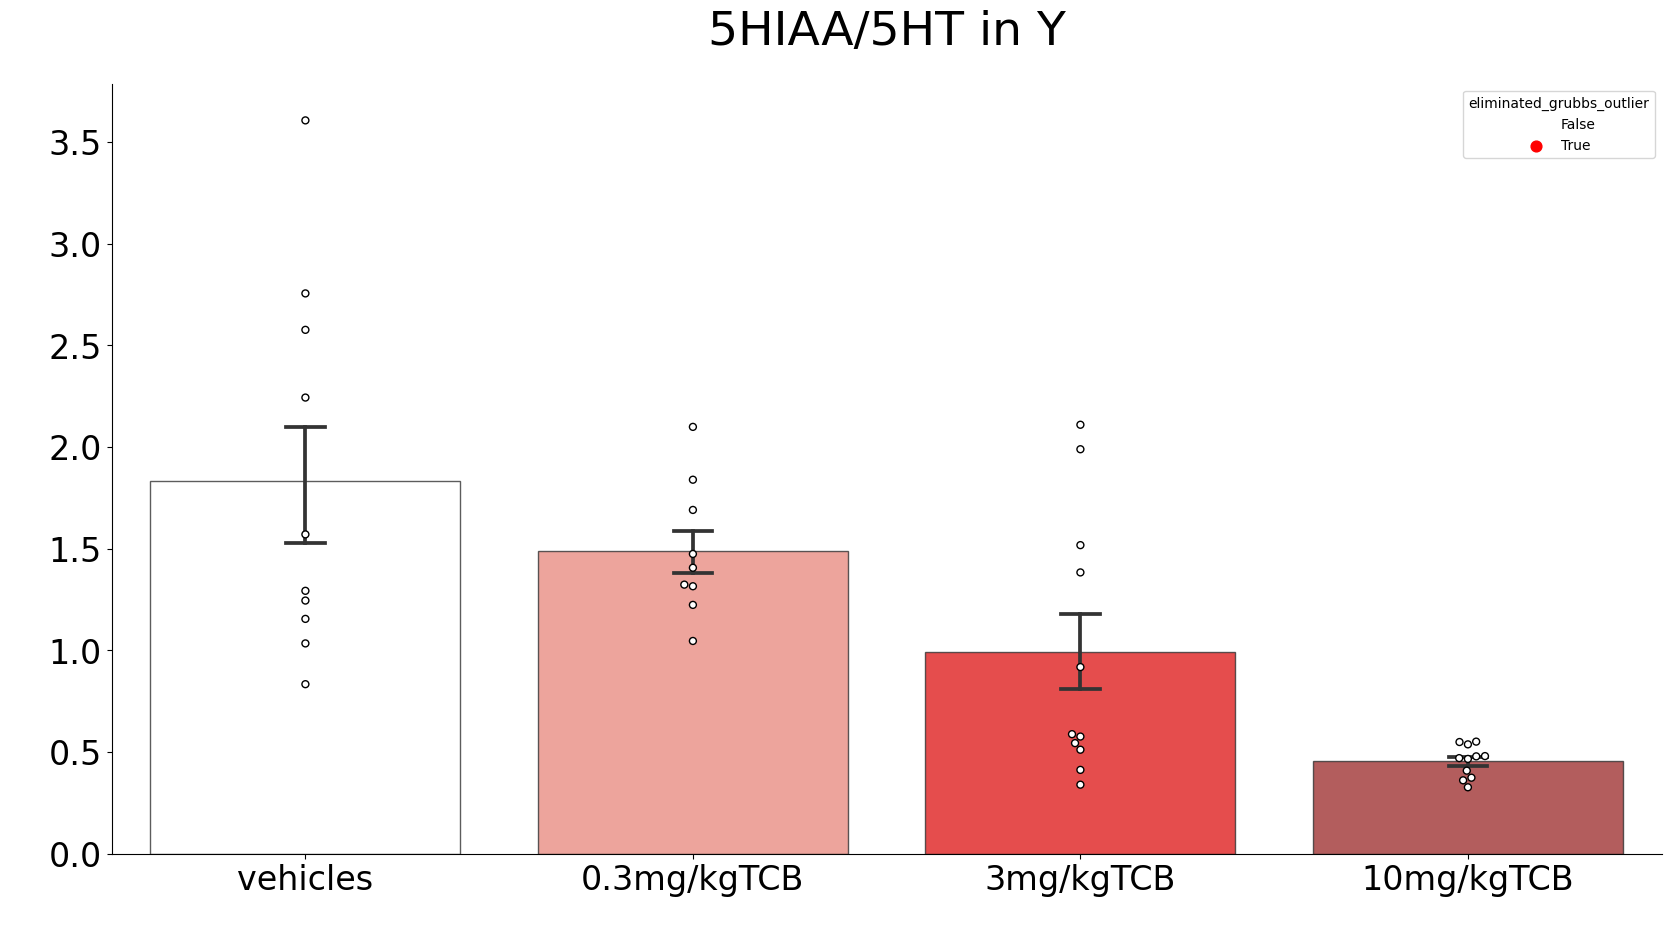

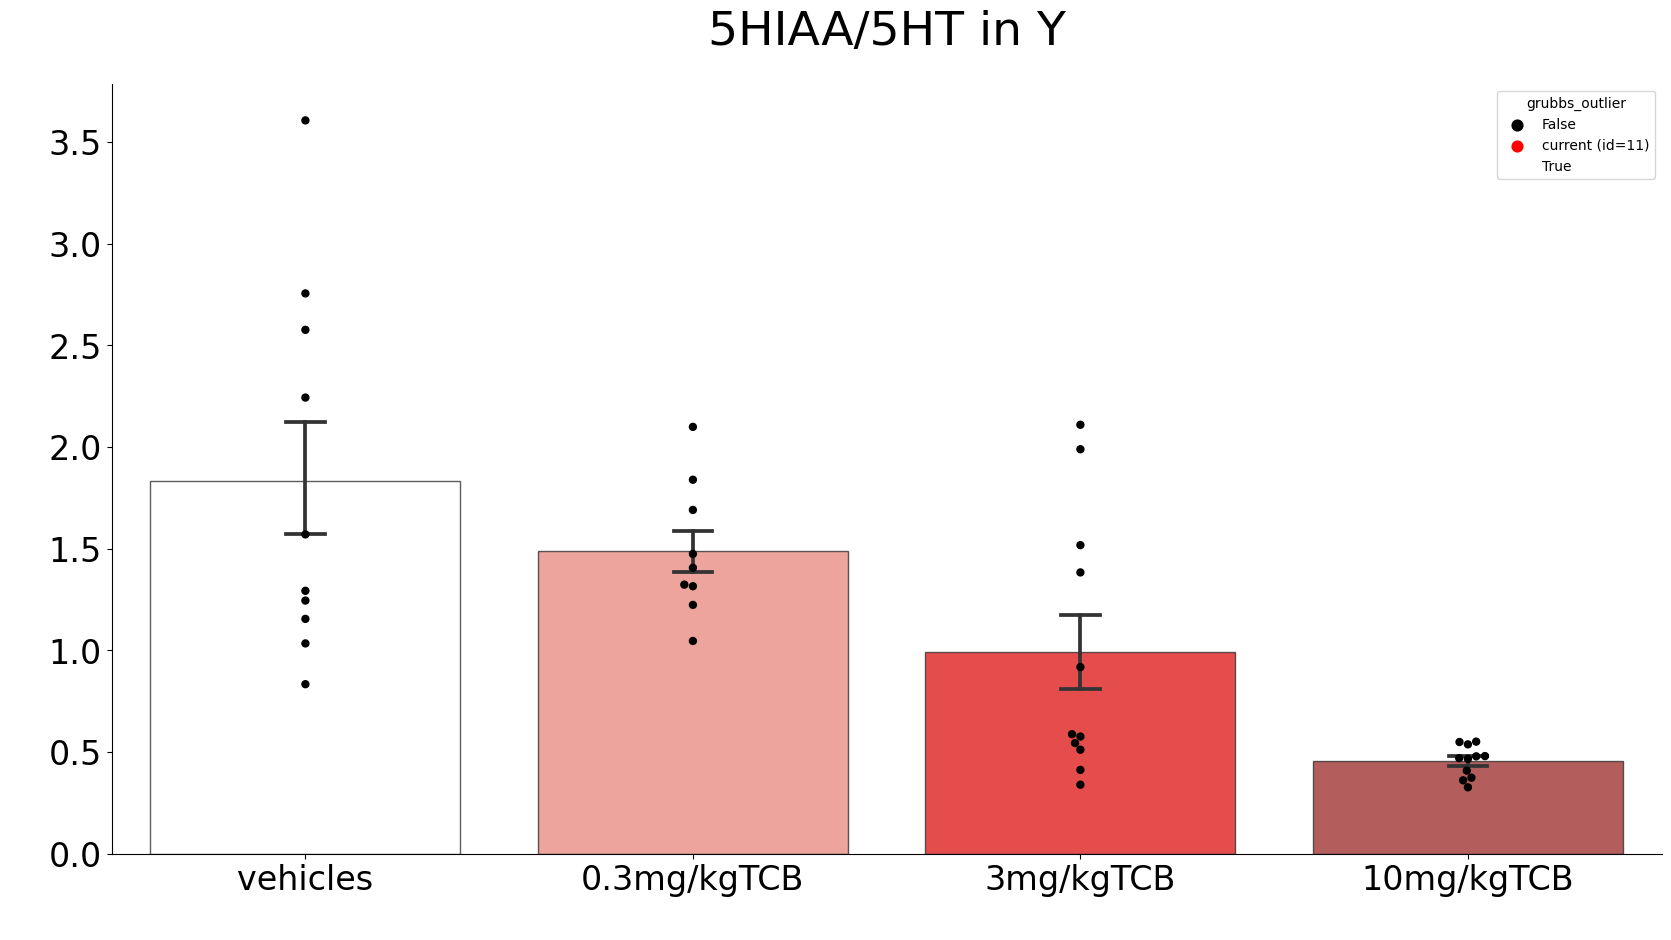

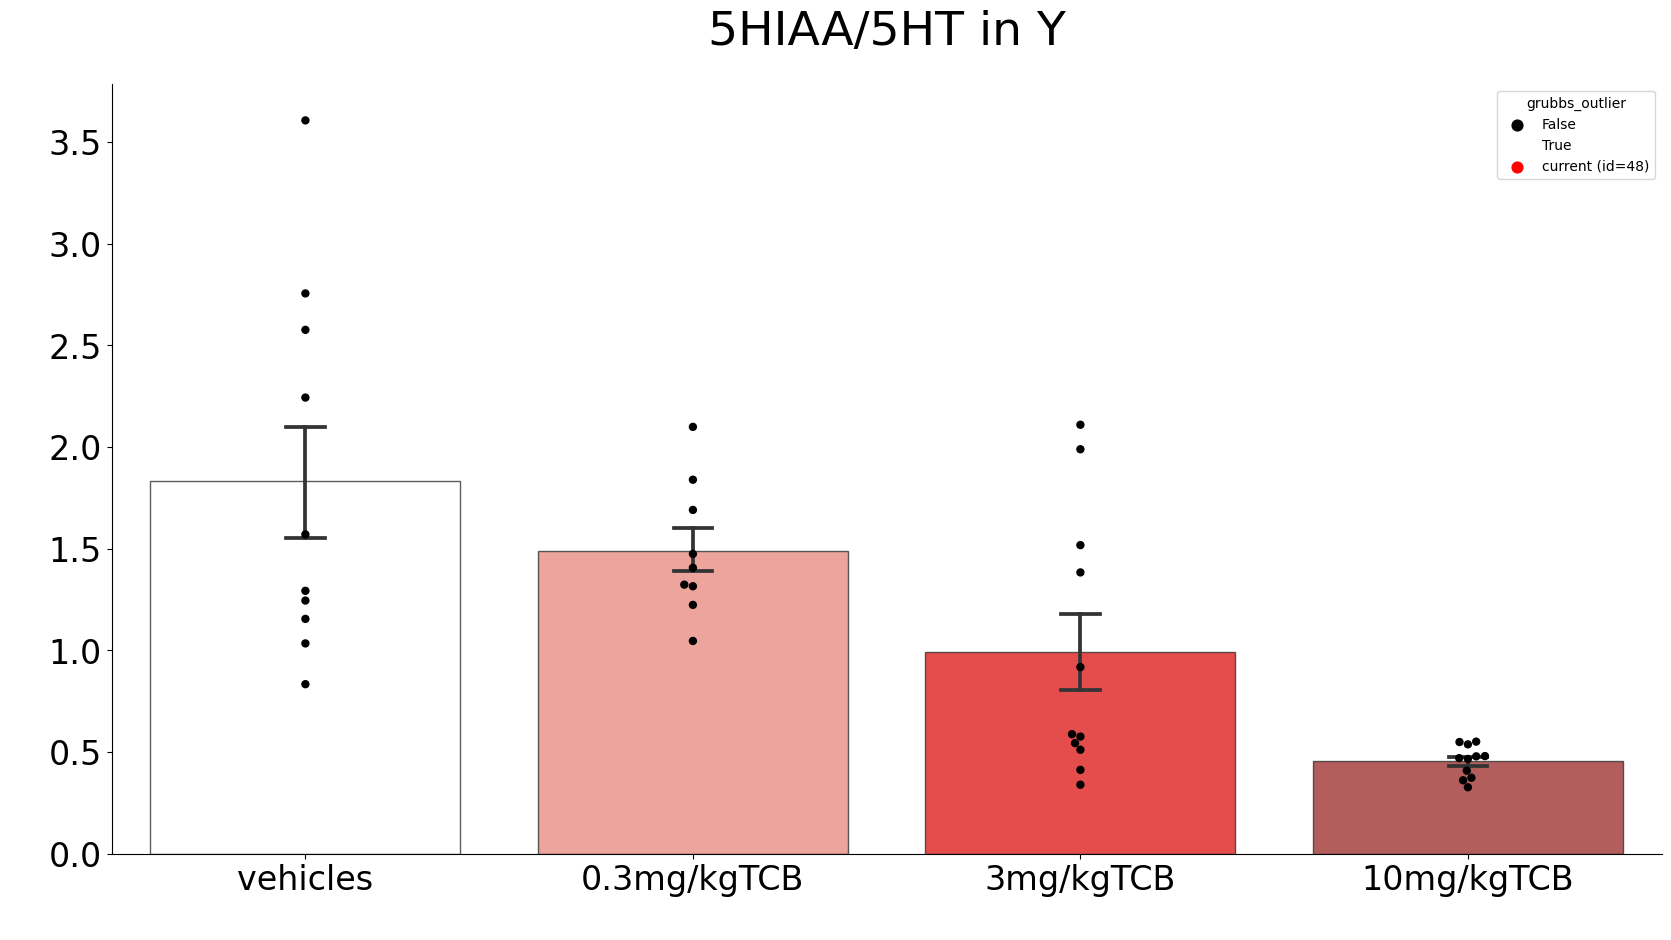

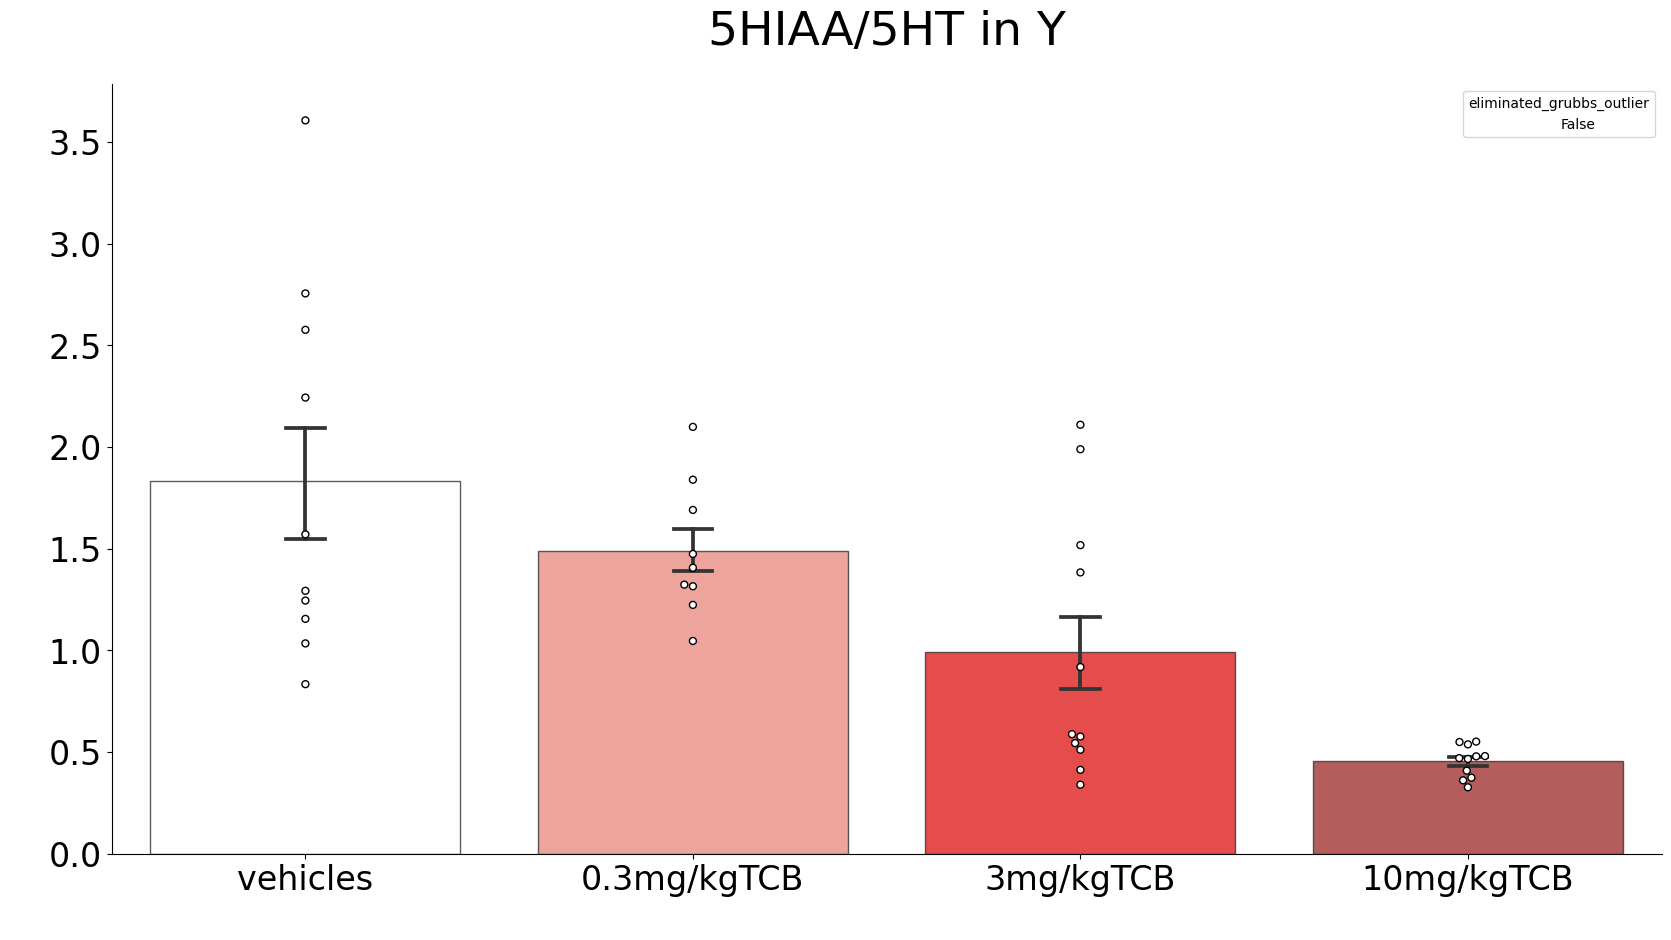

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/compound_and_ratios_df.pkl
['grubbs_outlier', 'eliminated_grubbs_outlier'] UPDATED FOR 5HIAA/5HT in Y of dose_response experiment

ONE_WAY_ANOVA NOT SIGNIFICANT
    F  p_value
0 NaN      NaN

TUKEY NOT SIGNIFICANT
        group1      group2  meandiff  p-adj  lower  upper  reject
0  0.3mg/kgTCB  10mg/kgTCB       NaN    NaN    NaN    NaN   False
1  0.3mg/kgTCB   3mg/kgTCB       NaN    NaN    NaN    NaN   False
2  0.3mg/kgTCB    vehicles       NaN    NaN    NaN    NaN   False
3   10mg/kgTCB   3mg/kgTCB    0.5349    NaN    NaN    NaN   False
4   10mg/kgTCB    vehicles       NaN    NaN    NaN    NaN   False
5    3mg/kgTCB    vehicles       NaN    NaN    NaN    NaN   False
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED


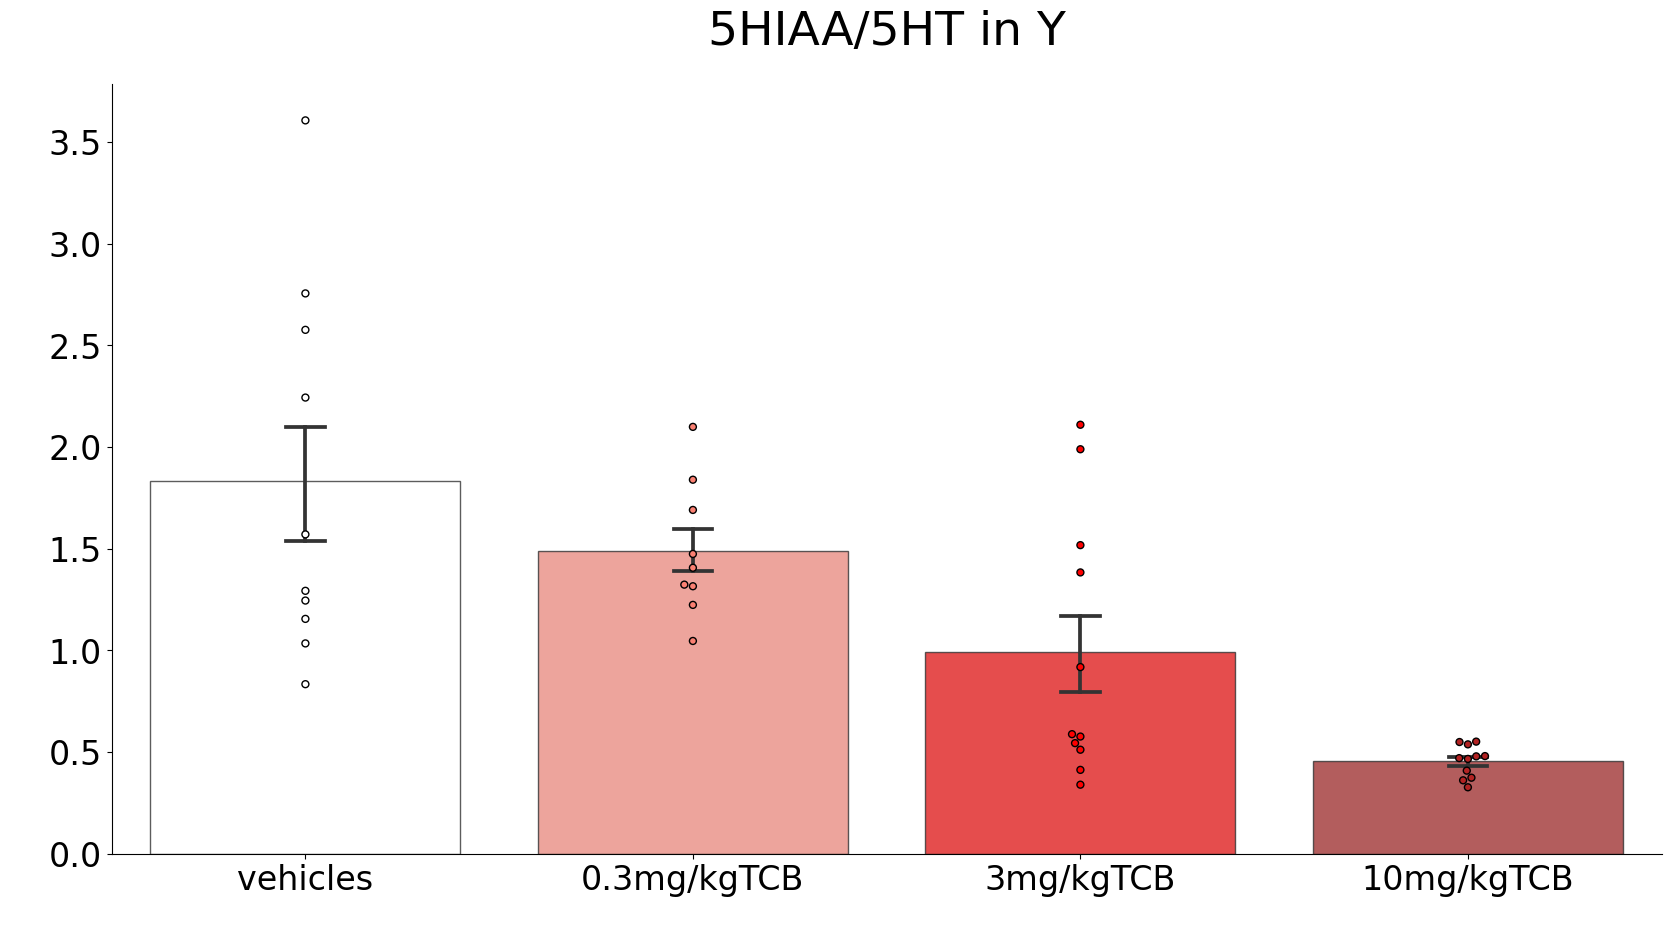

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_for_5HIAA_5HT_in_Y.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_Y.svg
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_Y.png
{'LSER/ASP', 'GABA/GLN', '5HT/THR', '5HIAA/ALA', '5HTP/ASPN', 'HVA/HIS', '3MT/GLY', 'ALA/HSER', 'VMA/ARG', 'ASP/ARG', 'ARG/DOPAC', 'LDOPA/ASPN', 'GLU/ARG', 'TYR/NA', 'LDOPA/5HT', 'HSER/5HTP', 'HSER/ASPN', '5HT/ARG', 'ASPN/THR', '5HT/DA', 'LSER', 'GLN/3MT', 'DA/5HIAA', 'DOPAC/5HT', 'HSER/DOPAC', 'GABA/HSER', 'HIS/5HT', 'ASP/GLY', 'GLN/5HIAA', 'TAU/LSER', 'DOPAC/TYR', 'HIS/5HTP', 'HIS/3MT', 'GLN/HVA', '5HTP/A', 'GLN/HIS', 'ASPN/DA', 'NA/TAU', 'VMA/ALA', 'HVA/TYR', 'VMA/NA', 'DA/THR', 'TYR/ALA', 'THR/TAU', 'A/THR', 'HVA/HSER', 'DOPAC/LDOPA', 'TYR/ASP', 'DOPAC/5HTP', 'LDOPA/ASP', 'GLY/5HTP', 'VMA/A', 'HSER/5HT', 'HVA/DA', 'GABA/ALA', '3MT/ASP', '5HT', 'GLU/GABA', 'ASP/THR', 'GABA/GLY', 'ARG/5HIAA', 'DOPAC

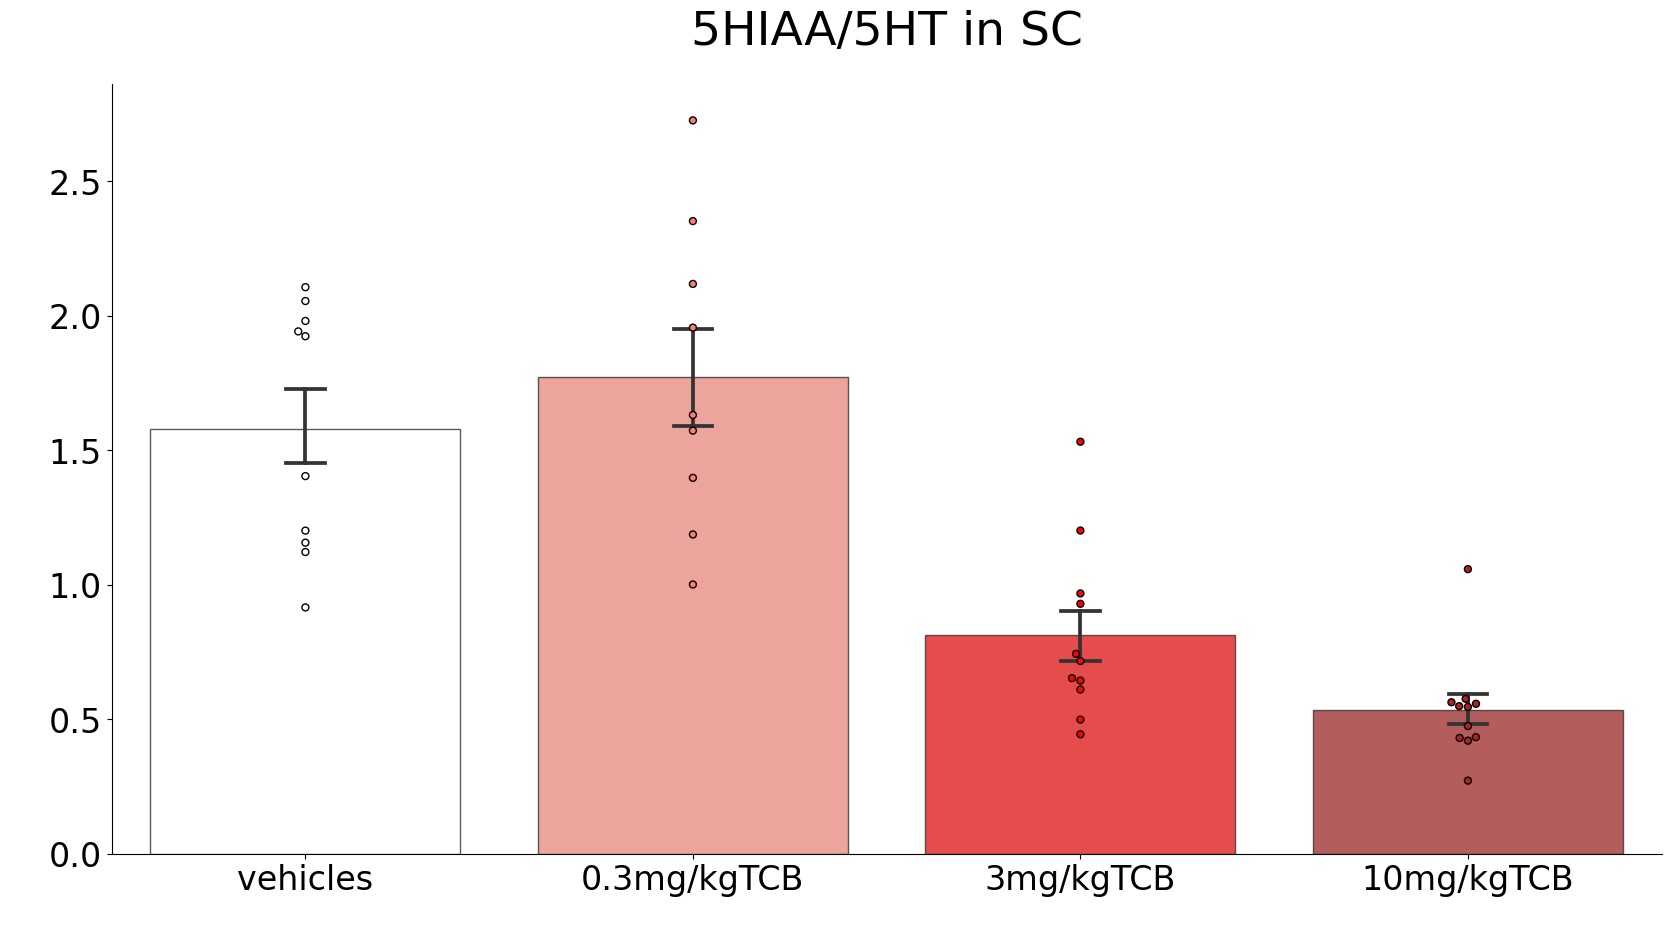

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_for_5HIAA_5HT_in_SC.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_SC.svg
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_SC.png
EXITING PROGRAM


SystemExit: 

UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.

In [6]:
#QUANTITATIVE HISTOGRAMS

quantitativeHistogram( 
    filename,
    p_value_threshold=0.05,
)

# quantitativeHistogram( #REMI this still forces prompts - not fun
#     filename,
#     experiment='agonist_antagonist',
#     compound='5HIAA/5HT',
#     region='AC',
#     outlier_test= 'grubbs', #this should not be asked every time it is something you would set once in the constants for this experiment, could do redo_outliers = T/F
#     #it forced me to do outliers as ther were not done 5HIAA/5HT in DL dont love this 
#     p_value_threshold=0.05, #again this should be a constant for the experiment 
#     from_scratch=True,
# )

# subselectDf(getCompoundAndRatiosDf(filename), {'compound':'5HIAA/5HT', 'region':'OF', 'experiment':'agonist_antagonist'})


In [ ]:
#CORRELOGRAMS

correlogram(filename, p_value_threshold=0.05) #with prompts

#copy bellow 
# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE


# correlogram(filename, 
#             experiment='agonist_antagonist', 
#             correlogram_type='compound',
#             to_correlate='DA-5HT', 
#             p_value_threshold=0.05, 
#             n_minimum=5, 
#             columns=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
#                      "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
#                      "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
#             from_scratch=True,
#             )

RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
WARNING
NotImplemented should not be used in a boolean context

TWO_WAY_ANOVA SIGNIFICANT
       Source       SS    DF       MS       F  p-unc   np2
0        TCB2  121.684   1.0  121.684  34.552    0.0  0.49
1         MDL    0.000   1.0    0.000   0.000    1.0  0.00
2  TCB2 * MDL   99.531   1.0   99.531  28.262    0.0  0.44
3    Residual  126.784  36.0    3.522     NaN    NaN   NaN

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  85.733301  6.245866e-16

TUKEY SIGNIFICANT
        group1     group2  meandiff   p-adj   lower   upper  reject
0  0.2mg/kgMDL  3mg/kgTCB    5.3636  0.0000  4.3233  6.4040    True
1  0.2mg/kgMDL    TCB+MDL    0.6364  0.3642 -0.4040  1.6767   False
2  0.2mg/kgMDL   vehicles    0.3333  0.8835 -0.8962  1.5629   False
3    3mg/kgTCB    TCB+MDL   -4.7273  0.0000 -5.7425 -3.7120    True
4    3mg/kgTCB   vehicles   -5.0303  0.0000 -6.2387 -3.8219    True
5  

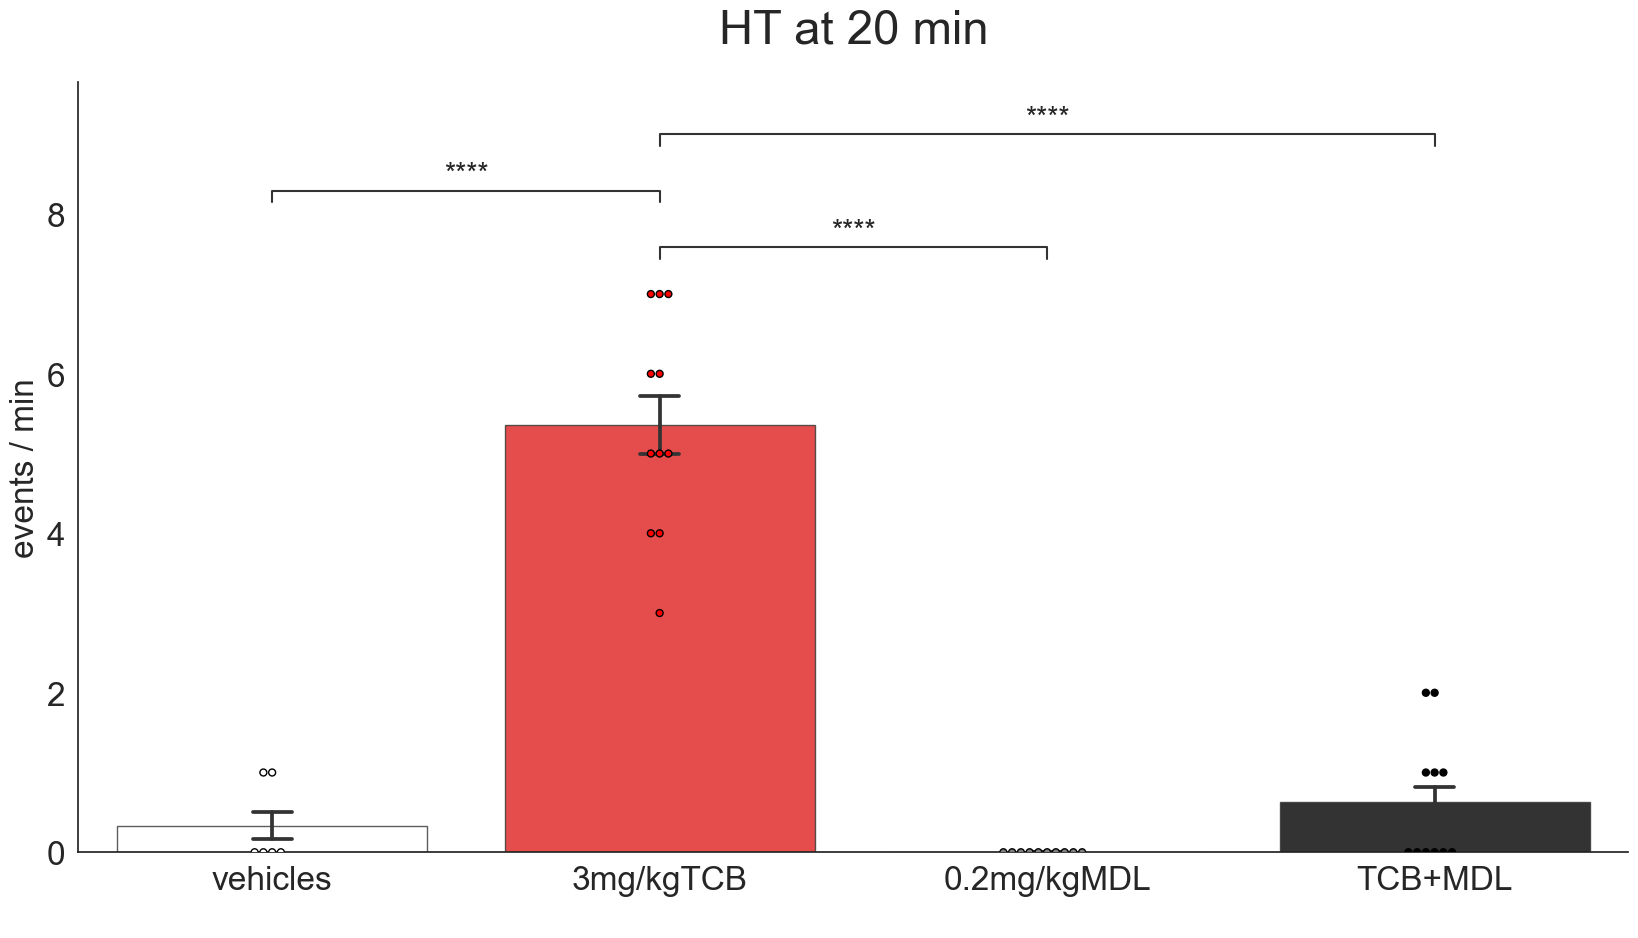

In [5]:
#BEHQVIOR (HT / ES) #REMI need to intergrate stats logic, outliers, prompts and building multiple at once
headTwitchHistogram(
    HT_filename,
    experiment='agonist_antagonist',
    vairable='HT_20',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)

# subselectDf(getHeadTwitchDf(HT_filename), {"treatment": "0.2mg/kgMDL", "experiment": "agonist_antagonist"})


In [6]:
#SUBSELECT RAW DATA

# subselectDf(getCompoundAndRatiosDf(filename), {"treatment": "3mg/kgTCB", "compound": "3MT", "region":["SJ", "dH"]})

subselectDf(getCompoundAndRatiosDf(filename), { "compound": "5HIAA/5HT", "region":["Y", "SC", "M", "MR"], 'experiment':'dose_response'})
#second pram is a dict of colname and subgroup to select


,mouse_id,group_id,value,compound,region,treatment,color,experiment,grubbs_outlier,eliminated_grubbs_outlier
156056,2,1,0.287632,5HIAA/5HT,M,vehicles,white,dose_response,NaN,NaN
157114,5,1,0.212173,5HIAA/5HT,M,vehicles,white,dose_response,NaN,NaN
158172,7,1,0.236728,5HIAA/5HT,M,vehicles,white,dose_response,NaN,NaN
159230,8,4,0.049405,5HIAA/5HT,M,10mg/kgTCB,firebrick,dose_response,NaN,NaN
159759,9,1,0.137207,5HIAA/5HT,M,vehicles,white,dose_response,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1197966,64,4,0.408526,5HIAA/5HT,Y,10mg/kgTCB,firebrick,dose_response,False,False
1198015,65,2,2.098837,5HIAA/5HT,Y,0.3mg/kgTCB,salmon,dose_response,False,False
1198113,67,1,1.244830,5HIAA/5HT,Y,vehicles,white,dose_response,False,False
1198211,68,4,0.478760,5HIAA/5HT,Y,10mg/kgTCB,firebrick,dose_response,False,False


In [6]:
#GET AGGERGATED STATS DF
subselectDf(getAggregateStatsDf(filename), {"treatment": "10mg/kgTCB", "experiment": "dose_response"})
#second pram is a dict of colname and subgroup to select


RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


,treatment,region,compound,experiment,shapiro_F,shapiro_p,is_valid,mean,std,sem,values
27868,10mg/kgTCB,AC,5HIAA,dose_response,0.948802,0.628688,True,0.061213,0.017420,0.005252,"[0.08560137, 0.053223793, 0.049058342, 0.02844..."
27869,10mg/kgTCB,AC,5HIAA/5HT,dose_response,0.984413,0.985714,True,0.432047,0.085798,0.025869,"[0.4687343760560557, 0.42240950001580946, 0.35..."
27870,10mg/kgTCB,AC,5HIAA/5HTP,dose_response,0.687213,0.000321,True,10.980239,13.005499,3.921305,"[2.831817541240991, 4.945500969470258, 4.28915..."
27871,10mg/kgTCB,AC,5HIAA/A,dose_response,0.741892,0.001630,True,106.286189,140.887185,42.479085,"[433.24697212788675, 241.02140599385942, 89.10..."
27872,10mg/kgTCB,AC,5HIAA/ALA,dose_response,0.900112,0.185434,True,0.001761,0.000419,0.000126,"[0.0018212453502475417, 0.0015957668563622504,..."
...,...,...,...,...,...,...,...,...,...,...,...
41797,10mg/kgTCB,vH,TYR/HVA,dose_response,NaN,1.000000,True,107.189108,140.212220,44.338997,"[283.1047605366569, 0.0, 0.0, 0.0, 0.0, 0.0, n..."
41798,10mg/kgTCB,vH,TYR/LSER,dose_response,0.772418,0.004083,True,0.084346,0.102888,0.031022,"[0.23636591002983406, 0.0, 0.0, 0.0, 0.0, 0.0,..."
41799,10mg/kgTCB,vH,TYR/NA,dose_response,0.782937,0.005611,True,14.438259,17.614757,5.311049,"[47.39925284857632, 0.0, 0.0, 0.0, 0.0, 0.0, 2..."
41800,10mg/kgTCB,vH,TYR/TAU,dose_response,0.767298,0.003499,True,0.008388,0.010507,0.003168,"[0.02597720632187491, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
#PCA

In [ ]:
#GRAPH THEORY 
#https://networkx.org/documentation/latest/